In [9]:
import segno
from segno import consts
import os
import random
import string
import io
from pyzbar.pyzbar import decode
from PIL import Image
from PIL import ImageOps
from utils import get_local_folder, get_random_background_path, get_random_image
import matplotlib.pyplot as plt
from PIL.Image import Resampling
from customized_plugin import write_artistic
RETRIES = 10
background_folder = get_local_folder()
background_folder = os.path.dirname(background_folder)
background_folder = os.path.dirname(background_folder)
background_folder = os.path.dirname(background_folder)
background_folder = os.path.join(background_folder, "checker")
background_folder = os.path.join(background_folder, "src")
background_folder = os.path.join(background_folder, "backgrounds_org")
# print(background_folder)
original_image = None
SCALE = 12
BORDER = 50
original_image = Image.open(get_random_background_path(background_folder))


In [10]:
flag = 'ENO'+''.join(random.choices(string.ascii_letters + string.digits + '\/=', k=48))
qr = segno.make_qr(flag, error='L', boost_error=False, version=4)
qr_size = qr.symbol_size(scale=SCALE, border=BORDER)
original_image = ImageOps.contain(original_image, qr_size)
processed_image = original_image.copy()
print(original_image.size)
print(qr_size)
box_image = Image.new('RGB', qr_size, (255, 255, 255))
paste_x = (qr_size[0] - processed_image.size[0]) // 2
paste_y = (qr_size[1] - processed_image.size[1]) // 2
box_image.paste(processed_image, (paste_x, paste_y))
box_image = box_image.convert('RGBA')


(1596, 1401)
(1596, 1596)


In [11]:
keep_modules = (consts.TYPE_FINDER_PATTERN_DARK, consts.TYPE_FINDER_PATTERN_LIGHT, consts.TYPE_SEPARATOR,
                    consts.TYPE_ALIGNMENT_PATTERN_DARK, consts.TYPE_ALIGNMENT_PATTERN_LIGHT, consts.TYPE_TIMING_DARK,
                    consts.TYPE_TIMING_LIGHT)
border_offset = BORDER * SCALE
d = SCALE // 3
holed_image = box_image.copy()
for i, row in enumerate(qr.matrix_iter(scale=SCALE, border=BORDER, verbose=True)):
    for j, m in enumerate(row):
            # if qr_code keep_modules goes here make it transparent
            if m in keep_modules:
                holed_image.putpixel((i, j), (0, 0, 0, 0))
            # if in qr code and not in border
            if (i > border_offset and j > border_offset) and (i < qr_size[0] - border_offset and j < qr_size[1] - border_offset):
                if (((i // d) % 3 == 1) and ((j // d) % 3 == 1)):
                    holed_image.putpixel((i, j), (0, 0, 0, 0))
                    
                    


In [12]:
qr_image = io.BytesIO()
qr.save(qr_image, kind='png', border=BORDER, scale=SCALE)
final_image = holed_image.copy()
qr_image = Image.open(qr_image)
qr_image = qr_image.convert('RGBA')
original_qr_image = qr_image.copy()
print(qr_image.size)
qr_image.paste(final_image, (0, 0), final_image)

(1596, 1596)


(-0.5, 265.5, 265.5, -0.5)

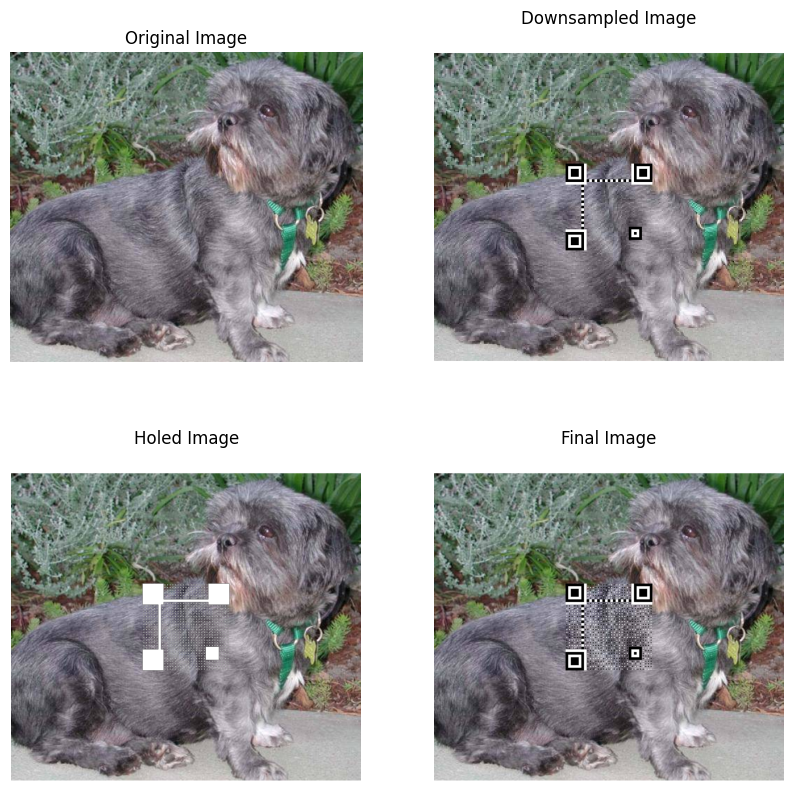

In [13]:
plot, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(original_image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[1, 0].imshow(holed_image)
axs[1, 0].set_title("Holed Image")
axs[1, 0].axis("off")
axs[1, 1].imshow(qr_image)
axs[1, 1].set_title("Final Image")
axs[1, 1].axis("off")


DOWNSCALE_FACTOR = 6
new_size = (qr_image.size[0]//DOWNSCALE_FACTOR, qr_image.size[1]//DOWNSCALE_FACTOR)
downsampled_image = qr_image.resize(new_size, resample=Resampling.NEAREST)
axs[0, 1].imshow(downsampled_image)
axs[0, 1].set_title("Downsampled Image")
axs[0, 1].axis("off")
# qr_image.save("qr.png")
# downsampled_image.save("qr_downsampled.png")